<a href="https://colab.research.google.com/github/JuanLG1998/EvaluacionTecnicaRocketel/blob/main/EvalTecP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación Técnica Rocketel Caso 1

## Limpieza y Transformación de Datos

In [ ]:
# Conexión del notebook con Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando bibliotecas de python para la manipulación y análisis de datos
import pandas as pd
import datetime as dt

# Creando dataset con la información a utilizar (datos_dummy)
datos = pd.read_csv('/content/drive/MyDrive/EvaluacionTecnica/datos_dummy.csv')

# Mostrando la información del dataset (primeras cinco columnas)
datos.head(10)

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,id_company,costo_venta
0,02/03/2023,NaN,26/08/2022,alta,1.0,100.0,3.0,1.0,200.0
1,20/03/2023,3966.0,04/02/2023,alta,42.0,5000.0,3.0,1.0,100.0
2,28/04/2023,2798.0,06/03/2023,alta,32.0,200.0,5.0,1.0,230.0
3,05/05/2023,3062.0,05/09/2022,alta,39.0,5000.0,1.0,1.0,200.0
4,17/05/2023,1512.0,08/04/2023,alta,26.0,50.0,4.0,1.0,NaN
5,NaN,2575.0,31/03/2023,alta,42.0,50.0,NaN,1.0,500.0
6,NaN,5283.0,08/01/2023,alta,7.0,NaN,5.0,NaN,500.0
7,14/02/2023,8705.0,NaN,alta,NaN,100.0,1.0,1.0,500.0
8,12/05/2023,2060.0,29/03/2023,NaN,46.0,500.0,4.0,NaN,200.0
9,12/01/2023,5779.0,12/01/2023,recarga,38.0,200.0,1.0,1.0,30.0


In [ ]:
# Obteniendo Información sobre el Dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha_transaccion  40482 non-null  object 
 1   id_sim             40602 non-null  float64
 2   fecha_activacion   40560 non-null  object 
 3   tipo_transaccion   40473 non-null  object 
 4   id_vendedor        40532 non-null  float64
 5   precio_de_venta    40544 non-null  float64
 6   bodega             40589 non-null  float64
 7   id_company         40413 non-null  float64
 8   costo_venta        40586 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


- Existen 45 mil registros
- La cantidad de datos nulos para cada columna es alrededor de 5 mil registros.
- Algunos tipos de datos conviene reespecificarlos.
- Los nombres de las columnas no tienen caracteres especiales por lo que no hay que modificarlos.

Contexto de los datos:
Base de datos de las transacciones de una compañia telefónica correspondientes a adquisiciones de nuevas SIM así como recargas de saldo.
- fecha_transacción: fecha en que se llevó a cabo la transacción.
- id_sim: identificador asociado a la SIM para la que se realizó la transacción.
- fecha_activacion: fecha en que se llevó a cabo la activación de la SIM.
- tipo_transaccion: si se trata de una activación o de una recarga de saldo.
- id_vendedor: identificador del vendedor que realizó la transacción.
- precio_de_venta: precio de la transacción al público.
- bodega: identificador de la bodega.
- id_company: identificador de la compañia donde se llevó a cabo la transacción.
- costo_venta: cuanto le cuesta a la empresa realizar la transacción.



Considero que la información que se puede obtener va relacionada con las fechas de transacción y los precios/costos de venta.

In [ ]:
# Creando una copia del dataset original para comenzar la limpieza de datos
data_clean = datos

In [ ]:
# Buscando si hay registros duplicados
data_clean.duplicated().value_counts()

False    45000
dtype: int64

- No hay registros duplicados.

### Tratamiento de valores nulos

Suponiendo que la situación se ha comunicado con la empresa y no hay posibilidad de obtener los valores faltantes...

La estrategia elegida es tratar de borrar la menor cantidad de datos posible, es por que ello que sólo se borraran:
- Los registros que no tengan fecha de transacción.
- Los registros que no tengan precio de venta o costo de venta.
- Los registros que tengan 3 o más columnas con valores nulos.

In [ ]:
# Eliminando registros sin fecha de transacción
data_clean = data_clean.dropna(subset='fecha_transaccion')
# Comprobando cuantos registros quedaron en el dataset (fila,columnas)
data_clean.shape

(40482, 9)

In [ ]:
# Eliminando registros sin costo y precio de venta
data_clean = data_clean.dropna(subset=['precio_de_venta','costo_venta'])
# Comprobando cuantos registros quedaron en el dataset (fila,columnas)
data_clean.shape

(32925, 9)

In [ ]:
# Eliminando registros con 3 o más columnas con valores nulos
data_clean = data_clean.dropna(thresh=3)
# Comprobando cuantos registros quedaron en el dataset (fila,columnas)
data_clean.shape

(32925, 9)

Después de esta limpieza nos hemos quedado con 32925 registros, lo que representa un 73% del dataset original.

Considero que es una buena cantidad de datos y que sirve para hacer análisis de datos significativo.

In [ ]:
# Observando a la columna id_company
data_clean.id_company.describe()

count    29611.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: id_company, dtype: float64

In [ ]:
# Verificando valores nulos de id_company
data_clean.id_company.isnull().sum()

3314

- Existen alrededor de 3 mil registros nulos pero todo apunta a que la columna id_company sólo tiene el valor de 1, lo que significa que toda la base de datos corresponde a las transacciones de dicha compañia, con el proposito de no seguir eliminando valores nulos podemos tener dos enfoques:
1. Elimnar la fila teniendo en cuenta que todos los datos corresponden a la compañia con ID 1.
2. Rellenar los datos de la columna para uniformizarlos al valor de 1.

Me decido por suponer que toda los datos corresponden a la compañía 1 elimino la columna para no entorpecer el análisis posterior.

In [ ]:
# Eliminando la columna id_company
data_clean = data_clean.drop(['id_company'], axis=1)
data_clean.head()

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,costo_venta
0,02/03/2023,NaN,26/08/2022,alta,1.0,100.0,3.0,200.0
1,20/03/2023,3966.0,04/02/2023,alta,42.0,5000.0,3.0,100.0
2,28/04/2023,2798.0,06/03/2023,alta,32.0,200.0,5.0,230.0
3,05/05/2023,3062.0,05/09/2022,alta,39.0,5000.0,1.0,200.0
7,14/02/2023,8705.0,NaN,alta,NaN,100.0,1.0,500.0


Los valores nulos para las demás filas serán rellenados con algún valor de referencia que no afecte el análisis.

In [ ]:
# Para el caso del id_sim a los registros nulos se les asignará un cero (significa no especificado)
data_clean.id_sim = data_clean.id_sim.fillna(0)
# Comprobando si existen aún valores nulos
data_clean.id_sim.isnull().sum()

0

In [ ]:
# Para el caso del id_vendedor a los registros nulos se les asignará un cero (significa no especificado)
data_clean.id_vendedor = data_clean.id_vendedor.fillna(0)
# Comprobando si existen aún valores nulos
data_clean.id_vendedor.isnull().sum()

0

In [ ]:
# Para el caso de la bodega a los registros nulos se les asignará un cero (significa no especificado)
data_clean.bodega = data_clean.bodega.fillna(0)
# Comprobando si existen aún valores nulos
data_clean.bodega.isnull().sum()

0

In [ ]:
# Para el caso del tipo de transacción a los registros nulos se les asignará un NE (no especificado)
data_clean.tipo_transaccion = data_clean.tipo_transaccion.fillna('NE')
# Comprobando si existen aún valores nulos
data_clean.bodega.isnull().sum()

0

Para el caso de la fecha de activación, esta no se modificará en caso de tener valores nulos.

In [ ]:
# Observando como queda nuestro dataset
data_clean.sample(11)

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,costo_venta
31018,04/02/2023,7126.0,NaN,alta,28.0,50.0,5.0,500.0
9809,08/03/2023,5840.0,11/01/2023,alta,21.0,50.0,1.0,200.0
29964,27/02/2023,1741.0,27/02/2023,alta,47.0,50.0,2.0,500.0
10696,12/02/2023,2325.0,12/02/2023,NE,38.0,100.0,3.0,200.0
30946,05/04/2023,0.0,10/10/2022,recarga,22.0,200.0,3.0,200.0
43822,13/04/2023,6738.0,23/02/2023,recarga,26.0,500.0,2.0,200.0
42318,18/01/2023,8291.0,14/11/2022,alta,14.0,200.0,5.0,100.0
13438,19/04/2023,5109.0,21/10/2022,alta,0.0,50.0,2.0,200.0
15847,06/04/2023,3220.0,06/04/2023,recarga,28.0,5000.0,5.0,200.0
17307,14/04/2023,4292.0,27/10/2022,recarga,44.0,200.0,1.0,30.0


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32925 entries, 0 to 44998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha_transaccion  32925 non-null  object 
 1   id_sim             32925 non-null  float64
 2   fecha_activacion   29682 non-null  object 
 3   tipo_transaccion   32925 non-null  object 
 4   id_vendedor        32925 non-null  float64
 5   precio_de_venta    32925 non-null  float64
 6   bodega             32925 non-null  float64
 7   costo_venta        32925 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.3+ MB


Ahora se observan inconsistencias en los tipos de dato por lo que conviene realizar algunas modificaciones.

### Transformación de tipos de dato

In [ ]:
# Modificando los tipos de datos de las columnas para poder trabajar correctamente con ellas

# Fechas como fechas
data_clean['fecha_transaccion'] = pd.to_datetime(data_clean['fecha_transaccion'], format='%d/%m/%Y')
data_clean['fecha_activacion'] = pd.to_datetime(data_clean['fecha_activacion'], format='%d/%m/%Y')

# Identificadores como string (se considera buena práctica)
# Primero se actualizan a entero
data_clean['id_sim'] = data_clean['id_sim'].astype(int)
data_clean['id_vendedor'] = data_clean['id_vendedor'].astype(int)
data_clean['bodega'] = data_clean['bodega'].astype(int)
# Luego se actualizan a string
data_clean['id_sim'] = data_clean['id_sim'].astype(str)
data_clean['id_vendedor'] = data_clean['id_vendedor'].astype(str)
data_clean['bodega'] = data_clean['bodega'].astype(str)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32925 entries, 0 to 44998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_transaccion  32925 non-null  datetime64[ns]
 1   id_sim             32925 non-null  object        
 2   fecha_activacion   29682 non-null  datetime64[ns]
 3   tipo_transaccion   32925 non-null  object        
 4   id_vendedor        32925 non-null  object        
 5   precio_de_venta    32925 non-null  float64       
 6   bodega             32925 non-null  object        
 7   costo_venta        32925 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 2.3+ MB


In [ ]:
# Comprobando si hay fechas invalidas -> mayores a la fecha actual

fecha_actual = dt.date.today()
#Validar si hay fechas de transaccion mayores a la actual
data_clean[data_clean['fecha_transaccion'].dt.date>fecha_actual]

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,costo_venta


In [ ]:
#Validar si hay fechas de activacion mayores a la actual
data_clean[data_clean['fecha_activacion'].dt.date>fecha_actual]

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,costo_venta


- Se comprueba que todas las fechas son validas.

In [ ]:
# Observando los estadísticos de nuestro dataset
data_clean.describe()

,precio_de_venta,costo_venta
count,32925.000000,32925.000000
mean,1177.315110,212.901139
std,1927.788186,160.756368
min,50.000000,30.000000
25%,100.000000,100.000000
50%,200.000000,200.000000
75%,500.000000,230.000000
max,5000.000000,500.000000


In [ ]:
# Observando los valores del precio de venta
data_clean.precio_de_venta.value_counts()

200.0     6655
5000.0    6641
50.0      6580
100.0     6566
500.0     6483
Name: precio_de_venta, dtype: int64

<Axes: ylabel='Frequency'>

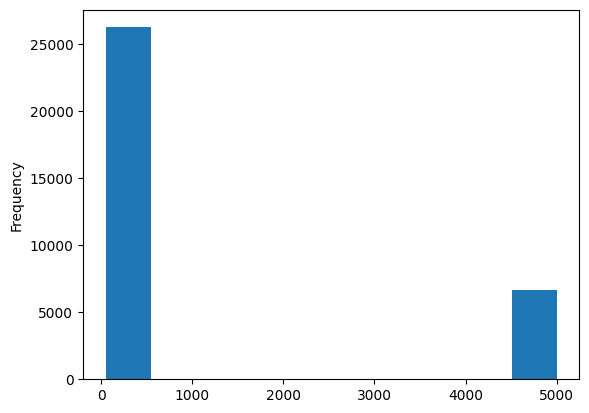

In [ ]:
# Observando un histograma de la columna precio de venta
data_clean.precio_de_venta.plot.hist()

Se observa que existen valores atípicos pues hay registros donde el precio de venta se registró como 5000.

Al analizar la distribución de los demás valores y al percatarme de es un error constante, puedo concluir que se trató de un error de inserción de datos al momento de ingresar la cantidad 500, por error se ingresó 5000.

La solución para uniformizar los datos sería reemplazar todos los valores de 5000 por 500.

In [ ]:
# Reemplazando los valores de 5000 por 500
data_clean.precio_de_venta = data_clean.precio_de_venta.replace({5000:500})
data_clean.describe()

,precio_de_venta,costo_venta
count,32925.000000,32925.000000
mean,269.661352,212.901139
std,193.684041,160.756368
min,50.000000,30.000000
25%,100.000000,100.000000
50%,200.000000,200.000000
75%,500.000000,230.000000
max,500.000000,500.000000


In [ ]:
# Observando características del dataset
data_clean.describe(include=object)

,id_sim,tipo_transaccion,id_vendedor,bodega
count,32925,32925,32925,32925
unique,8665,3,51,6
top,0,recarga,0,2
freq,3231,14857,3262,6055


In [ ]:
data_clean.id_sim.value_counts()

0       3231
3236      12
2396      12
6757      11
9952      11
        ... 
4102       1
4075       1
9588       1
1767       1
4513       1
Name: id_sim, Length: 8665, dtype: int64

In [ ]:
data_clean.tipo_transaccion.value_counts()

recarga    14857
alta       14780
NE          3288
Name: tipo_transaccion, dtype: int64

In [ ]:
data_clean.id_vendedor.value_counts()

0     3262
39     628
37     627
33     625
34     625
31     625
6      625
14     624
26     620
8      613
4      613
2      613
36     611
18     611
27     611
3      607
42     606
28     606
41     603
9      601
25     599
32     598
16     597
21     596
13     595
48     595
1      594
40     591
15     590
12     588
35     588
24     587
50     586
46     584
11     582
17     581
23     579
44     578
20     577
7      577
10     575
19     574
49     573
22     570
5      568
29     566
45     565
30     564
38     562
43     558
47     532
Name: id_vendedor, dtype: int64

In [ ]:
data_clean.bodega.value_counts()

2    6055
3    5968
4    5961
5    5908
1    5808
0    3225
Name: bodega, dtype: int64

En este punto considero que los datos están totalmente limpios, por lo que procederé a crear un nuevo archivo csv con los datos limpios.

In [ ]:
data_clean.to_csv('/content/drive/MyDrive/EvaluacionTecnica/datos_limpios.csv', index = False)

## Exploración y Análisis de Datos


Pendiente